In [1]:
import torch

import os
import tr_util
import util
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tr_util
import util
from Dimploma.EnvironmentTree import EnvInfo, MatrixEnvInfo
from Dimploma.ppo_parallel_custom import Agent
from Dimploma.utils.graph_provider import GraphProvider
from Dimploma.utils.my_agent_base import RandomAgent, OptimalAgent
from Dimploma.utils.testingResult import TestResult
from Dimploma.zNetwork.hybrid_gcn import HybridNetworkGlobal
from Dimploma.zNetwork.my_gcn import GCN
from Dimploma.zNetwork.fully_con import FCN
from Dimploma.zNetwork.old_gcn import GCN31

In [2]:
%load_ext autoreload
%autoreload 2

In [80]:
default_path = 'results/min_tree_ppo/node/'
# default_path = 'results/min_tree_ppo/node_cuda/'
agent_path = '250325_13#n10_e33_g41_6-1_wh'
correl_path = f'{default_path}{agent_path}'

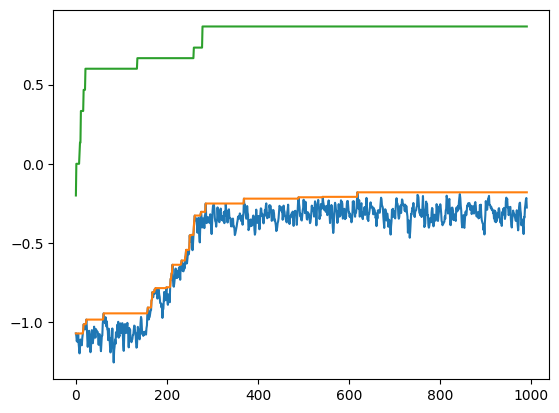

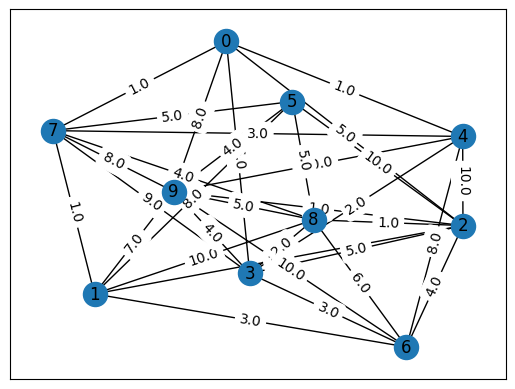

Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_999_last.pt


In [81]:
node_amount = 10
max_edge_amount = torch.sum(torch.arange(node_amount)).item()
edge_amount = 33

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
iteration_amount = 1000

# Main agent
main_hybrid = False
main_full = False
edge_info = True
node_info = True
step_info = False
adj_matrix = False
# main_edge_dim = 2
main_edge_dim = None
random_edge_dim = main_edge_dim
node_features = 2  # (index, {0,1} selected or not)
main_layers = 6
main_p_layers = 1
main_v_layers = 2
position = False
remove_index = False
main_cat = False
if position:
    node_features += 2
if remove_index:
    node_features -= 1

if main_hybrid:
    main_gcn = HybridNetworkGlobal(node_features, node_amount, remove_index=remove_index, position=position, edge_dim=main_edge_dim)
    random_gcn = HybridNetworkGlobal(node_features, node_amount, remove_index=remove_index, position=position, edge_dim=random_edge_dim)
elif main_full:
    main_gcn = FCN(node_amount, node_features, edge_amount, main_layers, main_p_layers, main_v_layers, edge_info, node_info, step_info, adj_matrix)
    random_gcn = FCN(node_amount, node_features, edge_amount, main_layers, main_p_layers, main_v_layers, edge_info, node_info, step_info, adj_matrix)
else:
    main_gcn = GCN(node_amount, node_features, cat=main_cat, conv_layers=main_layers, conv_p_layers=main_p_layers, linear_layers=main_v_layers, remove_index=remove_index, position=position, edge_dim=main_edge_dim)
    # main_gcn = GCN31(node_amount, node_features, remove_index)
    # random_gcn = GCN31(node_amount, node_features, remove_index)
    random_gcn = GCN(node_amount, node_features, cat=main_cat, conv_layers=main_layers, conv_p_layers=main_p_layers, linear_layers=main_v_layers, remove_index=remove_index, position=position, edge_dim=random_edge_dim)


graph_provider = GraphProvider(fixed_graph=None, device=device, nodes=node_amount, edges=edge_amount, position=position)

env_info = EnvInfo(graph_provider)
if main_full:
    env_info = MatrixEnvInfo(graph_provider, edge_info, node_info, step_info, adj_matrix)

loaded_graph, test_env, agent_test = tr_util.load_agent_for_testing(correl_path, iteration_amount, env_info, main_gcn, device, False)

In [82]:

agent = Agent(main_gcn, test=True)


obs, _ = test_env.reset()
deg = util.get_out_edges(obs)

files = os.listdir(f'{correl_path}/models/')

cors = np.zeros((len(files), 2))

i = 0
for file in files:
    # load agent
    agent.load_model(f"{correl_path}/models/{file}")
    # test agent
    cor = agent.test_correl(test_env, deg)
    spl = file.split('_')
    if len(spl) == 2:
        spl2 = spl[1].split('.')
        iter = int(spl2[0])
    else:
        iter = int(spl[1])
    cors[i, 0] = iter
    cors[i, 1] = cor
    i += 1
    
final_cors = np.array(cors)

# files[-1].split('_')
cors

Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_0.pt
Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_157.pt
Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_158.pt
Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_16.pt
Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_166.pt
Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_167.pt
Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_168.pt
Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_17.pt
Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_171.pt
Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/models/iter_173.pt
Loading model from results/min_tree_ppo/node/250325_13#n10_e33_g41_6-1_wh/

array([[0.00000000e+00, 1.78074200e-01],
       [1.57000000e+02, 4.86749193e-01],
       [1.58000000e+02, 4.14359460e-01],
       [1.60000000e+01, 2.86457030e-01],
       [1.66000000e+02, 4.01328619e-01],
       [1.67000000e+02, 5.01666749e-01],
       [1.68000000e+02, 4.71537286e-01],
       [1.70000000e+01, 2.46254164e-01],
       [1.71000000e+02, 4.75526807e-01],
       [1.73000000e+02, 4.24799572e-01],
       [1.75000000e+02, 5.02368010e-01],
       [1.90000000e+01, 2.77193270e-01],
       [1.99000000e+02, 4.39725991e-01],
       [2.07000000e+02, 4.35310786e-01],
       [2.08000000e+02, 4.78449765e-01],
       [2.10000000e+02, 4.84022966e-01],
       [2.11000000e+02, 5.38579142e-01],
       [2.12000000e+02, 4.96630085e-01],
       [2.20000000e+01, 2.75288752e-01],
       [2.30000000e+01, 2.57485959e-01],
       [2.31000000e+02, 4.46604432e-01],
       [2.32000000e+02, 4.52212043e-01],
       [2.40000000e+02, 4.66328805e-01],
       [2.41000000e+02, 4.04009071e-01],
       [2.420000

In [83]:
cors = np.array(final_cors)
sc = cors.argsort(axis=0)
sorted_cors = final_cors[sc[:, 0]]
sorted_cors

array([[0.00000000e+00, 1.78074200e-01],
       [1.60000000e+01, 2.86457030e-01],
       [1.70000000e+01, 2.46254164e-01],
       [1.90000000e+01, 2.77193270e-01],
       [2.20000000e+01, 2.75288752e-01],
       [2.30000000e+01, 2.57485959e-01],
       [6.00000000e+01, 2.22512695e-01],
       [6.10000000e+01, 2.69344127e-01],
       [1.57000000e+02, 4.86749193e-01],
       [1.58000000e+02, 4.14359460e-01],
       [1.66000000e+02, 4.01328619e-01],
       [1.67000000e+02, 5.01666749e-01],
       [1.68000000e+02, 4.71537286e-01],
       [1.71000000e+02, 4.75526807e-01],
       [1.73000000e+02, 4.24799572e-01],
       [1.75000000e+02, 5.02368010e-01],
       [1.99000000e+02, 4.39725991e-01],
       [2.07000000e+02, 4.35310786e-01],
       [2.08000000e+02, 4.78449765e-01],
       [2.10000000e+02, 4.84022966e-01],
       [2.11000000e+02, 5.38579142e-01],
       [2.12000000e+02, 4.96630085e-01],
       [2.31000000e+02, 4.46604432e-01],
       [2.32000000e+02, 4.52212043e-01],
       [2.400000

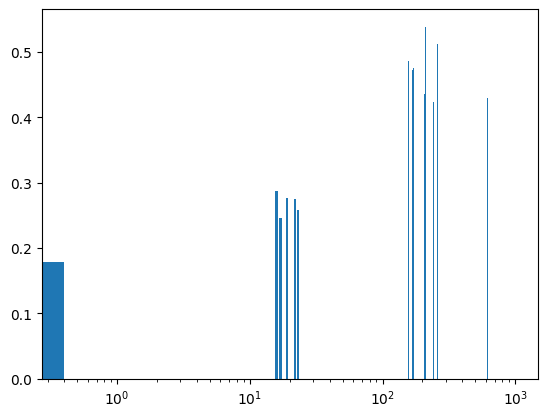

In [84]:
labels = [str(int(x)) for x in sorted_cors[:, 0]]
# plt.bar(labels, sorted_cors[:, 1])
plt.bar(sorted_cors[:, 0], sorted_cors[:, 1])
plt.xscale('log')
# plt.xticks(x, labels)
plt.show()